In [1]:
from utils import *
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
installment = pd.read_csv(r"c:\Users\Admin\Desktop\Visualization\Final\dseb63_installments_payments.csv")
app_train =  pd.read_csv(r"c:\Users\Admin\Desktop\Visualization\Final\dseb63_application_train.csv")

I. Tổng quan dữ liệu 

,Attribute,Value
0,Shape,Rows: 7744758 Columns: 8
1,Numerical Columns,SK_ID_PREV NUM_INSTALMENT_VERSION NUM_INSTALMENT_NUMBER DAYS_INSTALMENT DAYS_ENTRY_PAYMENT AMT_INSTALMENT AMT_PAYMENT SK_ID_CURR
2,Categorical Columns,None
3,Data Types,SK_ID_PREV: int64 NUM_INSTALMENT_VERSION: float64 NUM_INSTALMENT_NUMBER: int64 DAYS_INSTALMENT: float64 DAYS_ENTRY_PAYMENT: float64 AMT_INSTALMENT: float64 AMT_PAYMENT: float64 SK_ID_CURR: float64


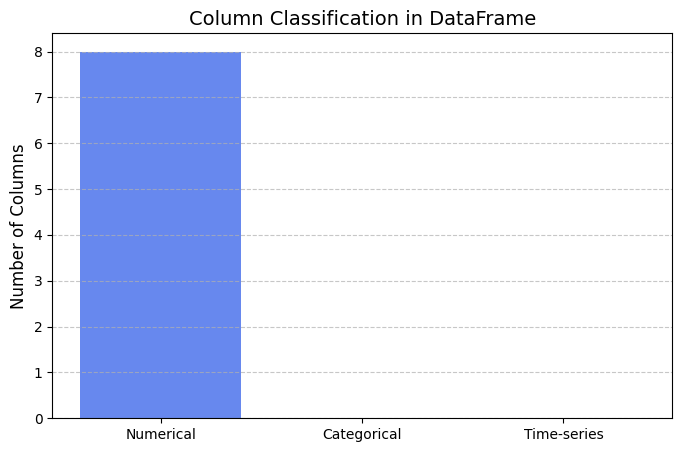

In [3]:
display_dataframe_info(installment)

,Column,Missing Count,Missing Percentage (%)
4,DAYS_ENTRY_PAYMENT,1639,0.02%
6,AMT_PAYMENT,1639,0.02%
0,SK_ID_PREV,0,0.00%
1,NUM_INSTALMENT_VERSION,0,0.00%
2,NUM_INSTALMENT_NUMBER,0,0.00%
3,DAYS_INSTALMENT,0,0.00%
5,AMT_INSTALMENT,1,0.00%
7,SK_ID_CURR,1,0.00%


There are 1 rows with more than 50% missing values.


,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR
7744757,2657771,0.0,94,-4.0,NaN,NaN,NaN,NaN


c:\Users\Admin\Desktop\Final data prep\EDA\utils.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


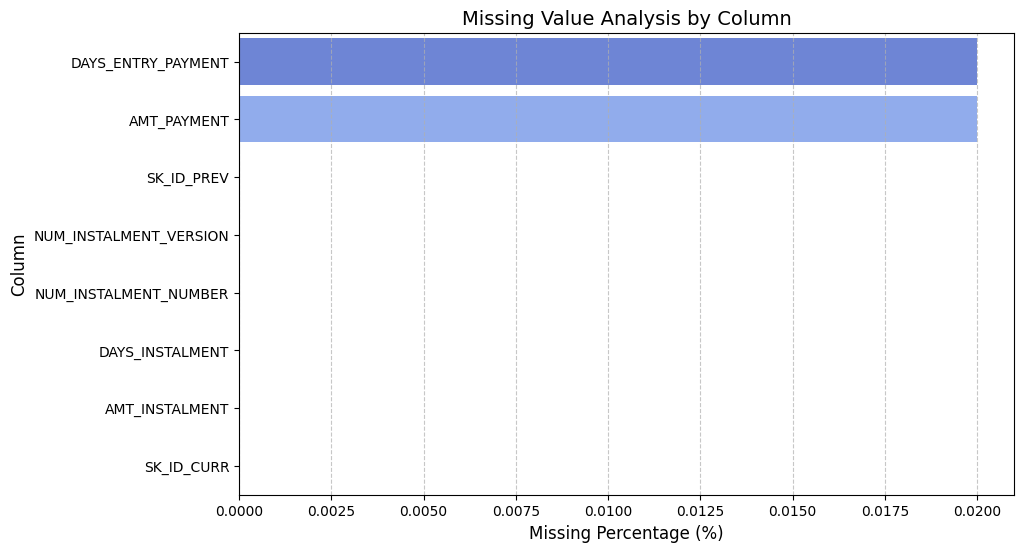

In [4]:
analyze_missing_values(installment)

## Missing values
- 'DAYS_ENTRY_PAYMENT' and 'AMT_PAYMENT' have a higher percentage of missing values at around 0.02%.

In [5]:
basic_statistics_summary(installment)

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,7744758.00,1902824.30,536057.05,1000001.00,1432108.00,1895642.00,2368895.00,2843495.00
NUM_INSTALMENT_VERSION,7744758.00,0.83,0.98,0.00,0.00,1.00,1.00,178.00
NUM_INSTALMENT_NUMBER,7744758.00,19.92,27.63,1.00,4.00,9.00,21.00,275.00
DAYS_INSTALMENT,7744758.00,-1055.68,800.97,-2922.00,-1677.00,-842.00,-369.00,-2.00
DAYS_ENTRY_PAYMENT,7743119.00,-1064.30,800.62,-3160.00,-1686.00,-851.00,-379.00,-2.00
AMT_INSTALMENT,7744757.00,16724.76,49977.46,0.00,4050.00,8611.92,16413.12,3771487.85
AMT_PAYMENT,7743119.00,16853.89,54076.02,0.00,3375.00,7906.19,15750.00,3771487.85
SK_ID_CURR,7744757.00,153573.95,88642.67,0.00,76848.00,153076.00,230144.00,307508.00


In [6]:
installment_update = merge_target(installment,app_train)

Successfully merged 'TARGET' column into the data.



=== Outlier Detection and Handling ===


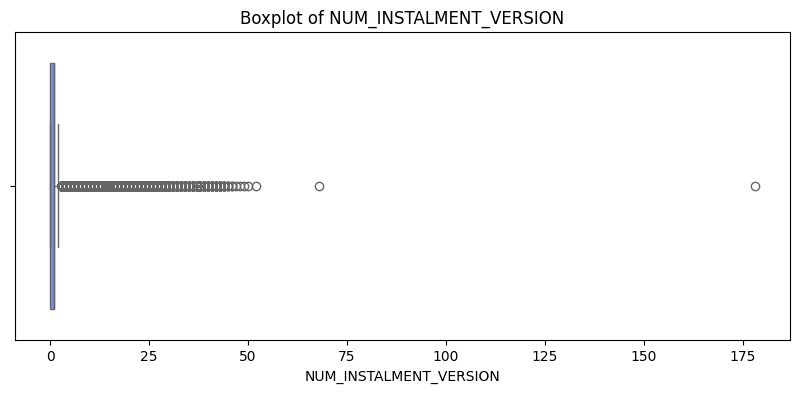

Outliers detected in column NUM_INSTALMENT_VERSION: 93024 rows


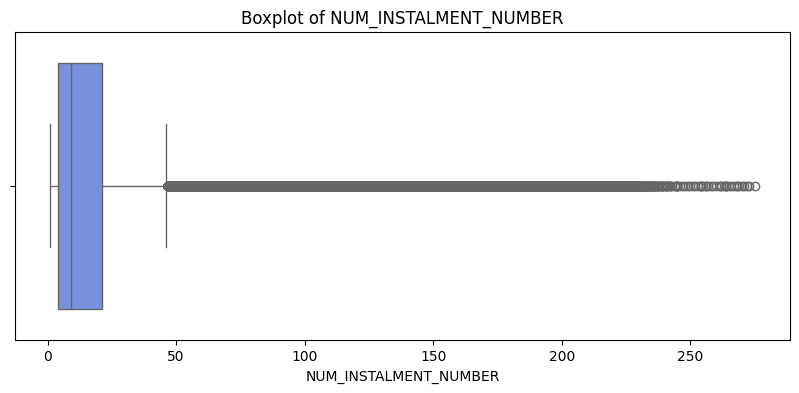

Outliers detected in column NUM_INSTALMENT_NUMBER: 196237 rows


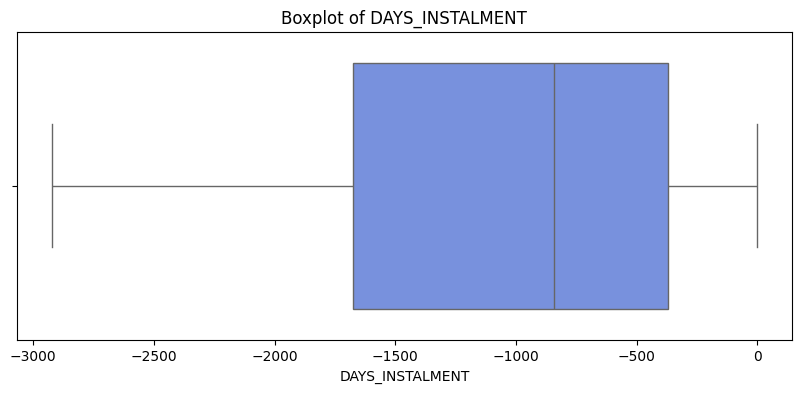

No outliers detected in column DAYS_INSTALMENT.


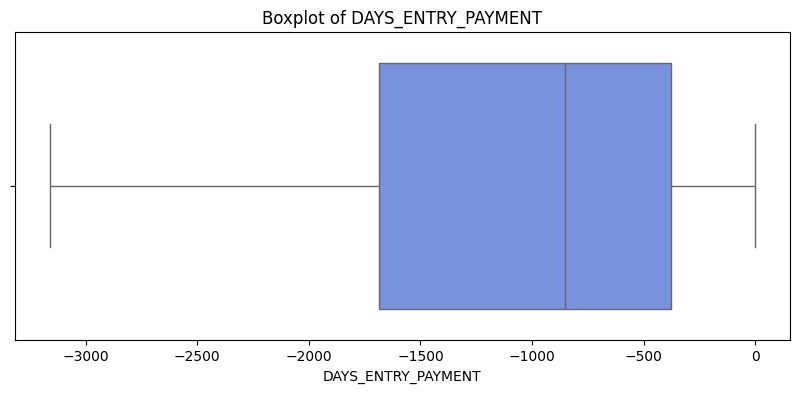

No outliers detected in column DAYS_ENTRY_PAYMENT.


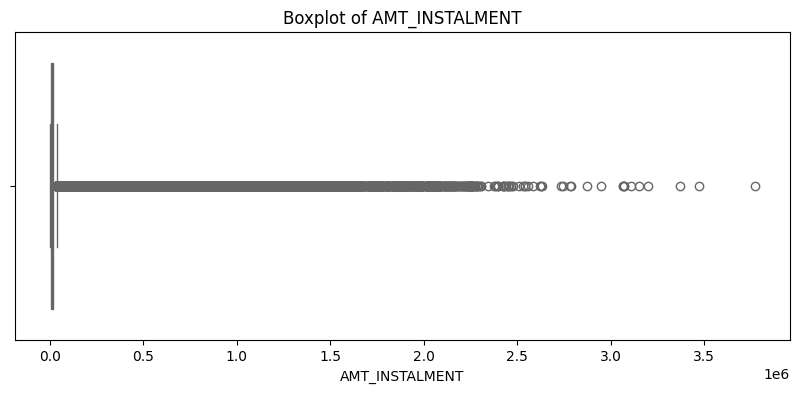

Outliers detected in column AMT_INSTALMENT: 67466 rows


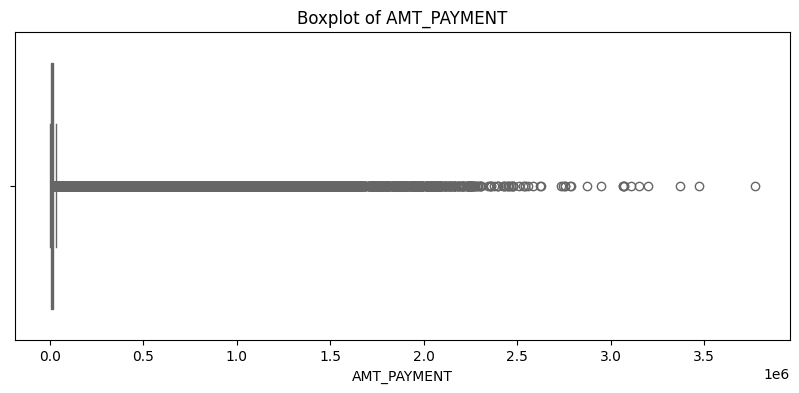

Outliers detected in column AMT_PAYMENT: 74864 rows


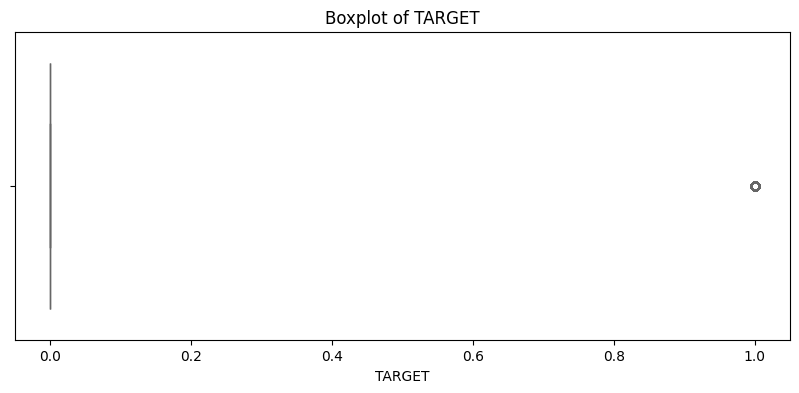

Outliers detected in column TARGET: 473853 rows


In [7]:
checking_outlier(installment_update)

'NUM_INSTALMENT_VERSION,' 'NUM_INSTALMENT_NUMBER,' 'DAYS_INSTALMENT,' 'DAYS_ENTRY_PAYMENT,' 'AMT_INSTALMENT,' and 'AMT_PAYMENT.' These outliers could influence the results of the analysis or modeling process. Therefore, it is crucial to carefully assess them and determine whether to address them through removal or transformation, depending on the analysis objectives and data characteristics. Furthermore, missing values in the 'DAYS_ENTRY_PAYMENT,' 'AMT_INSTALMENT,' and 'AMT_PAYMENT' columns should also be addressed during data preprocessing.

In [8]:
checking_imbalance(installment_update, "TARGET")


=== Checking for Imbalanced Columns ===



=== Low-Variance Feature Detection ===


c:\Users\Admin\Desktop\Final data prep\EDA\utils.py:322: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=numeric_cols, y=variances, palette="viridis")


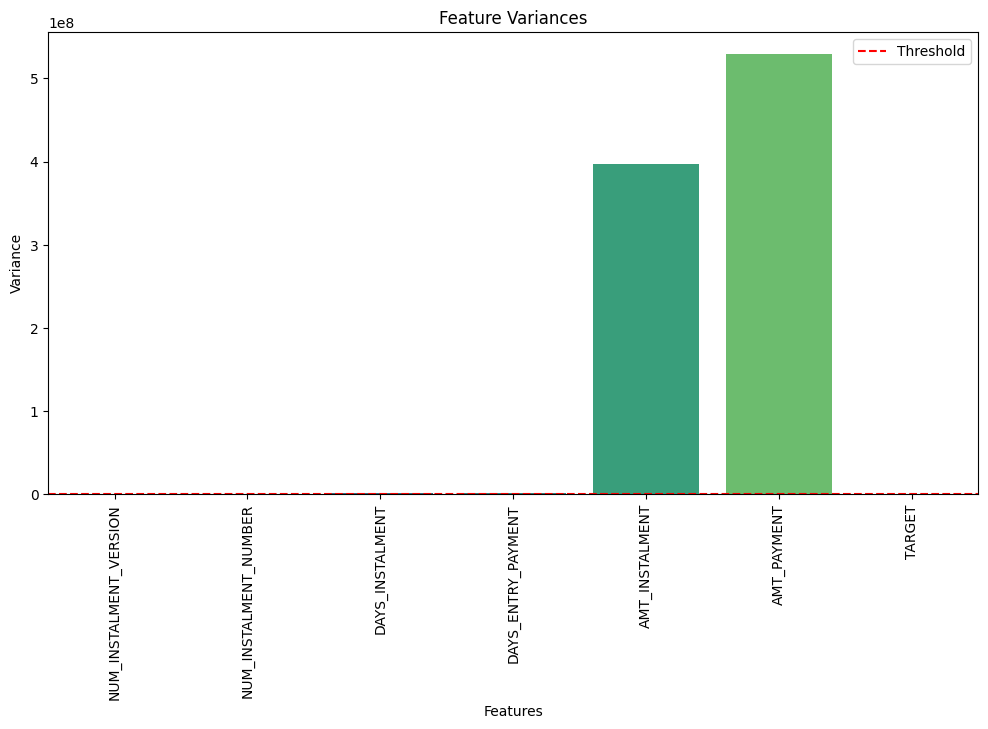

No low-variance columns detected.


[]

In [9]:
low_variance(installment_update)

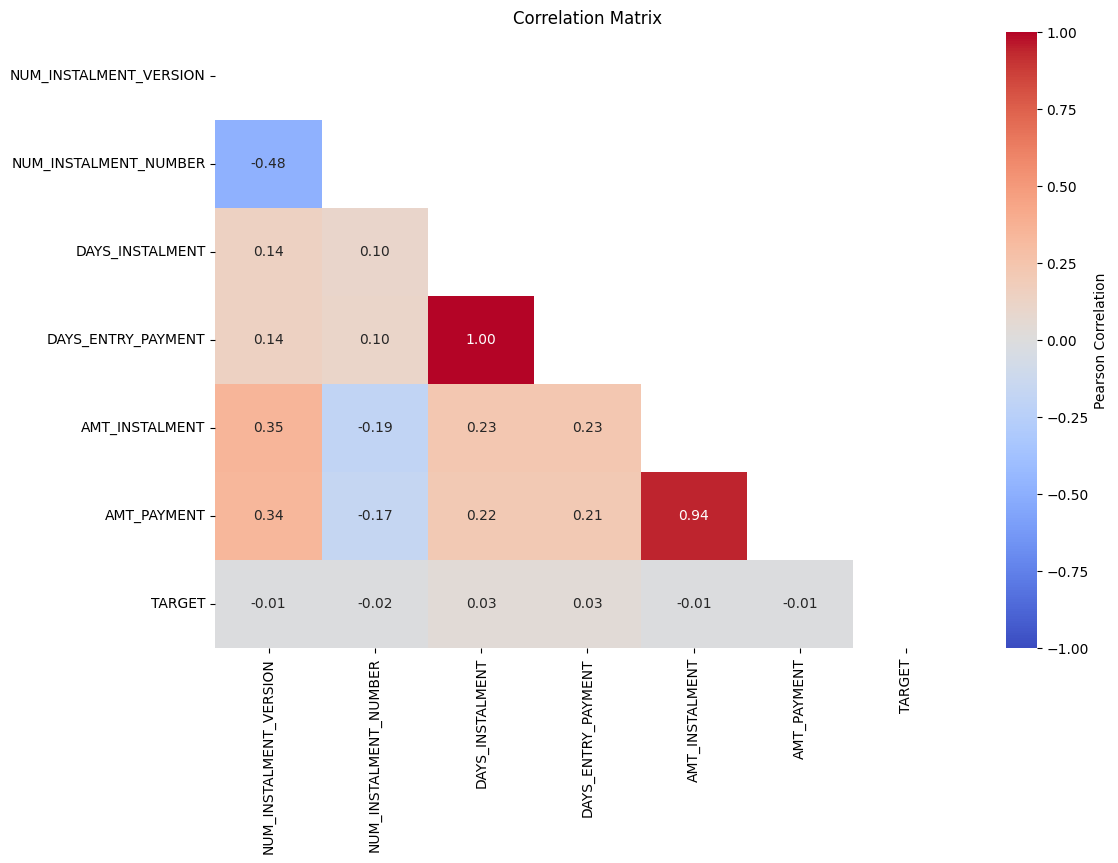


Strong correlations above threshold:
         Variable 1          Variable 2  Correlation
11  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT     0.999488
18   AMT_INSTALMENT         AMT_PAYMENT     0.941821


In [10]:
correlation_matrix(installment_update)


Generating pairplot for numerical variables...


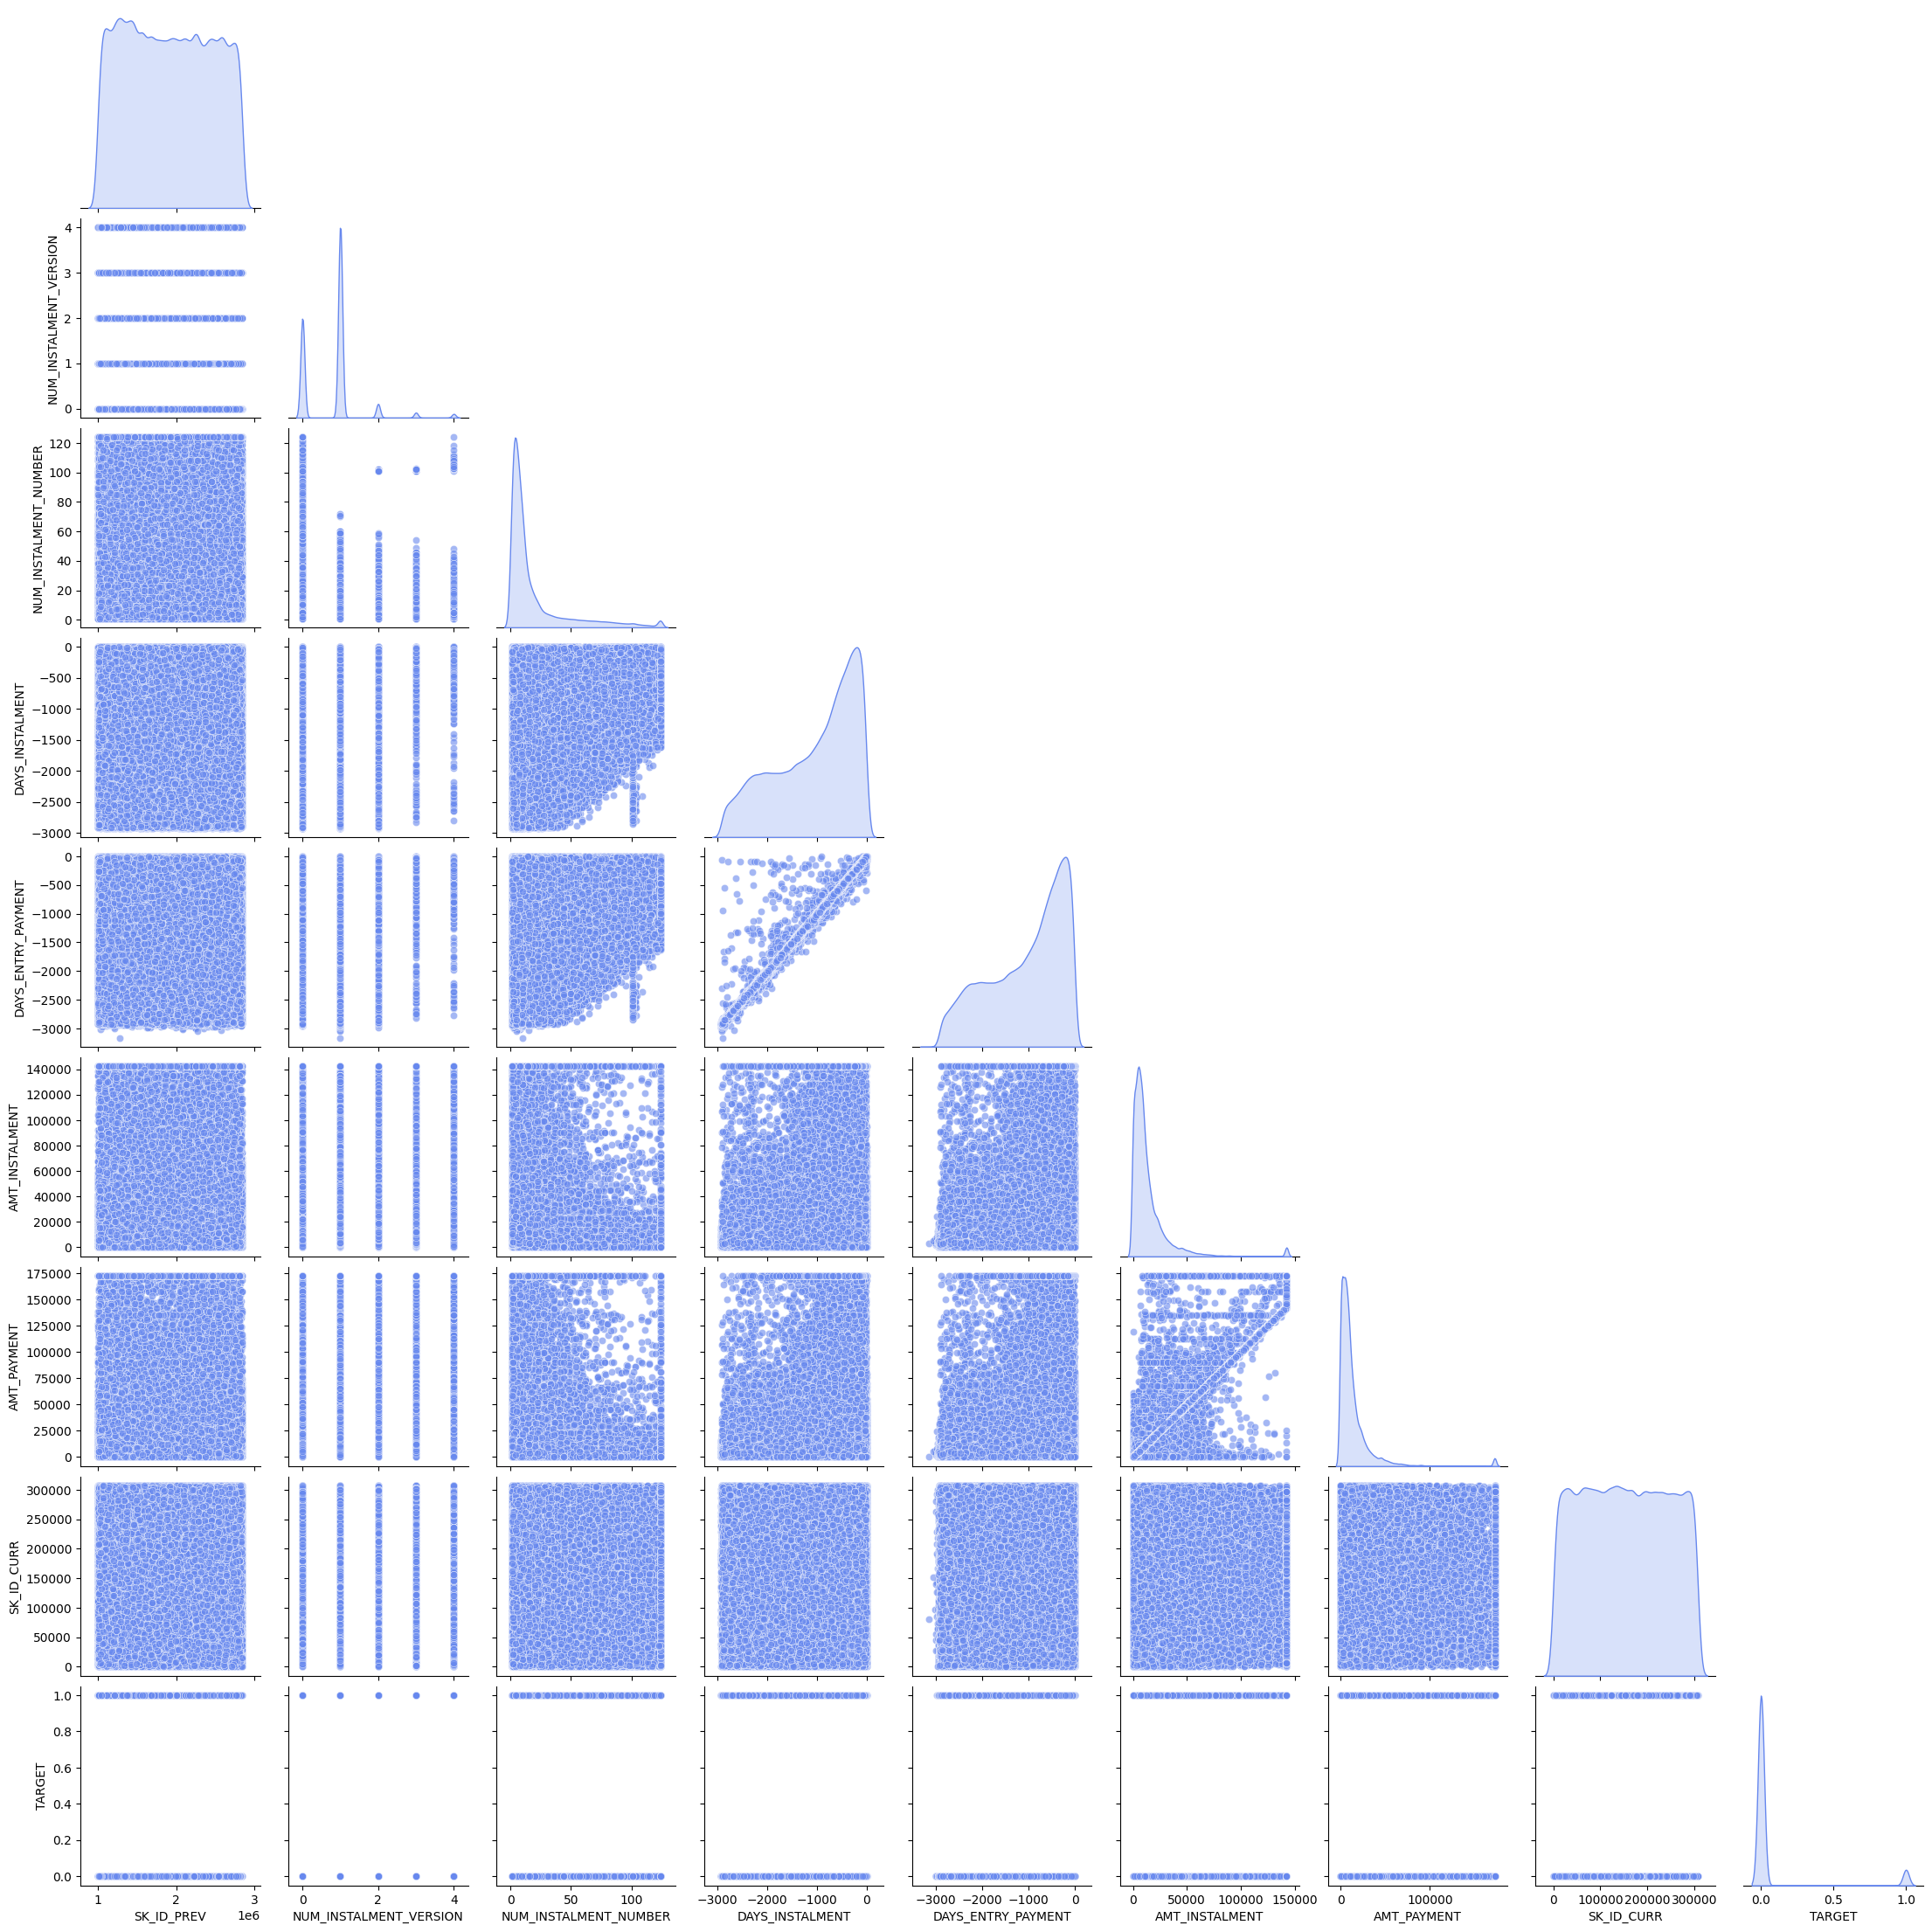

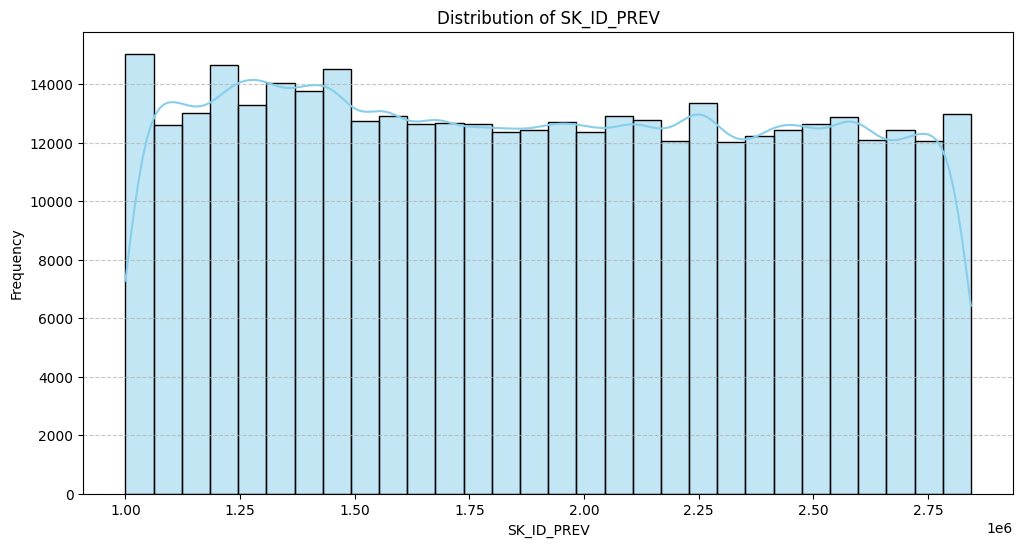

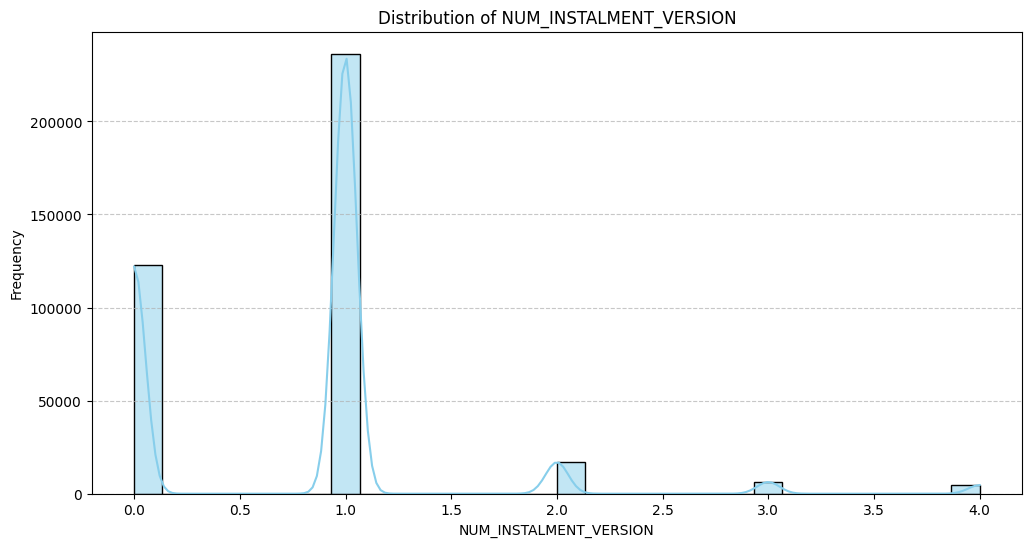

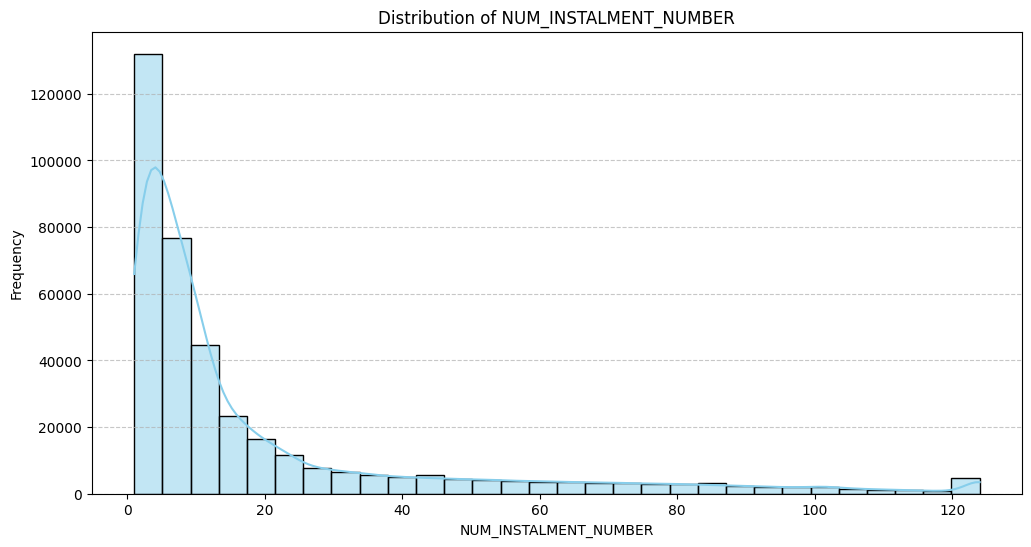

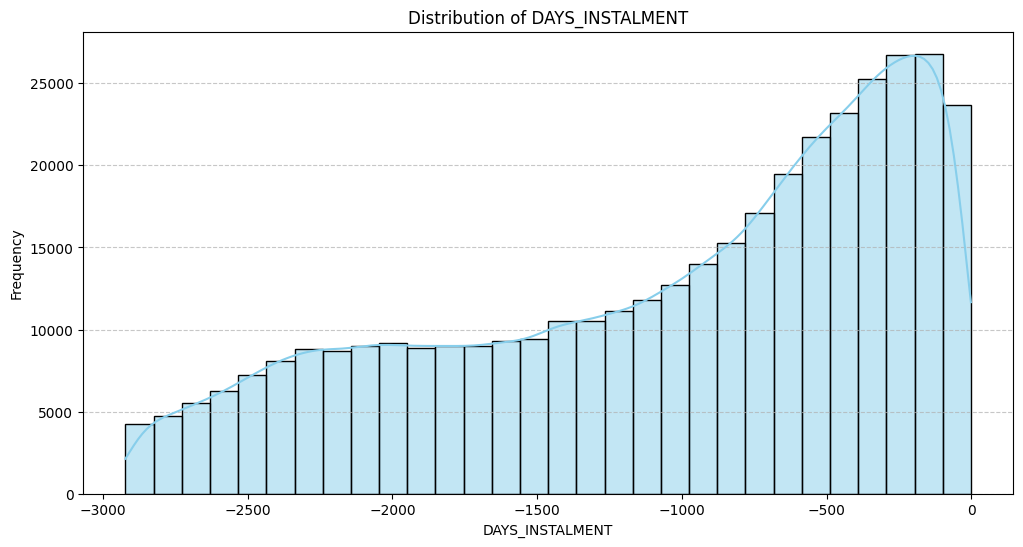

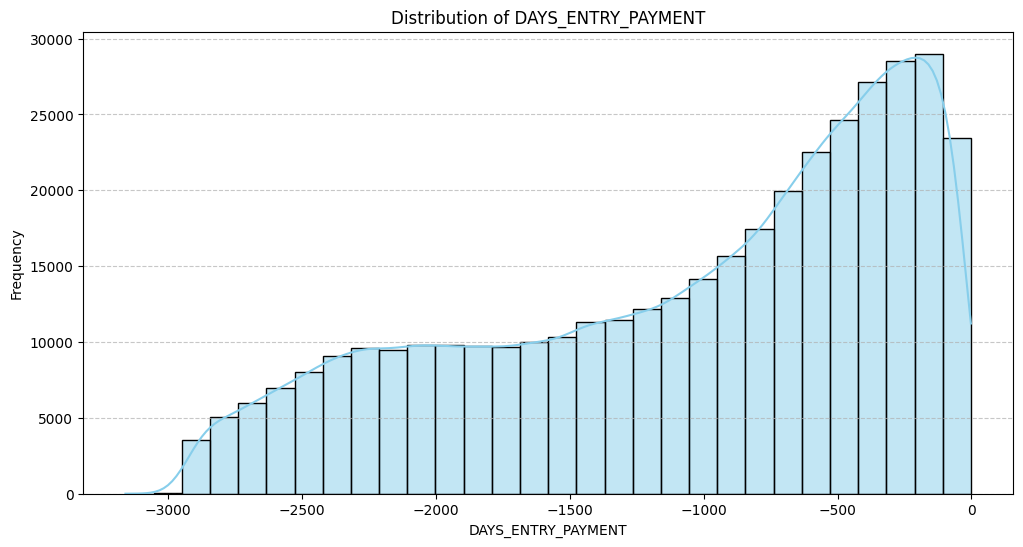

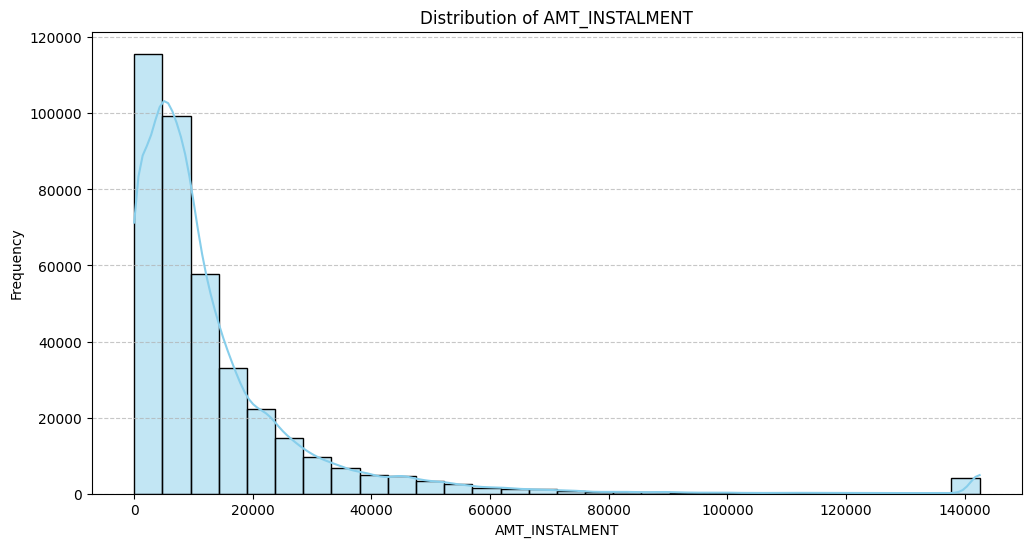

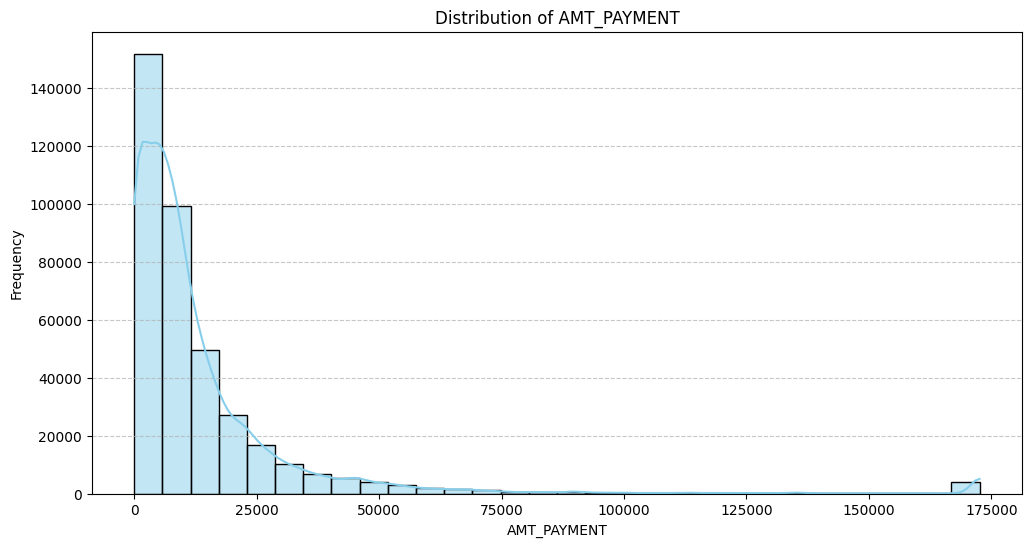

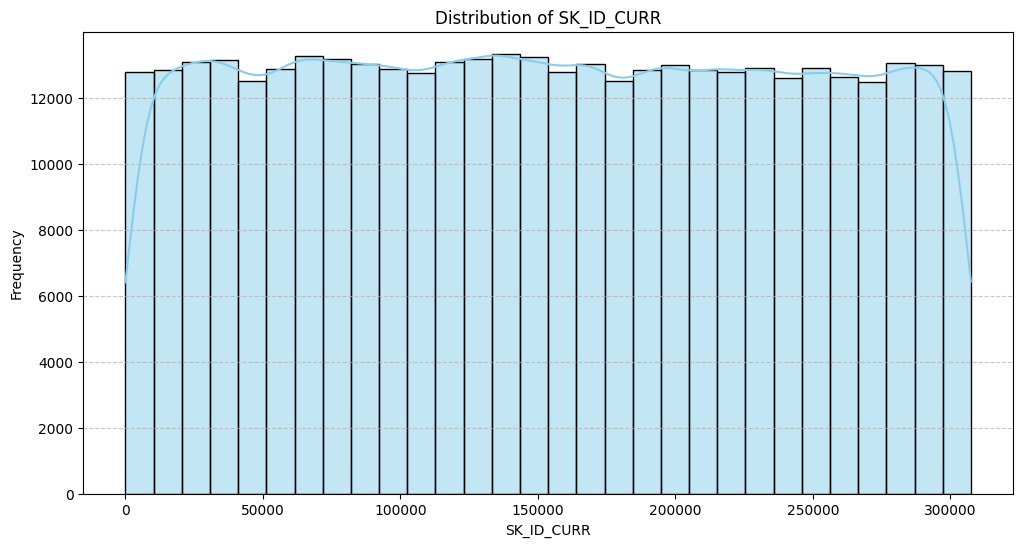

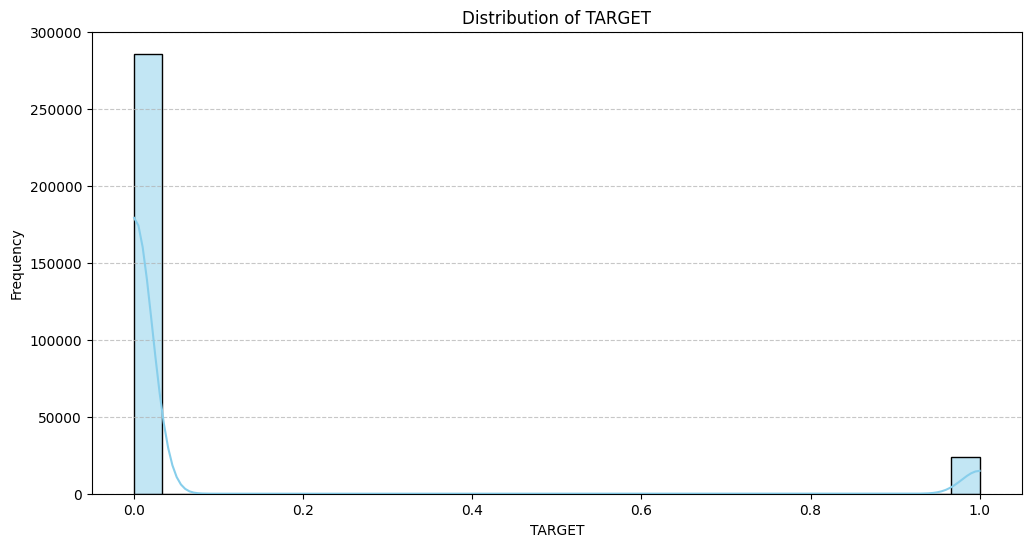

In [11]:
analyze_numeric_relationships(installment_update,0.05)

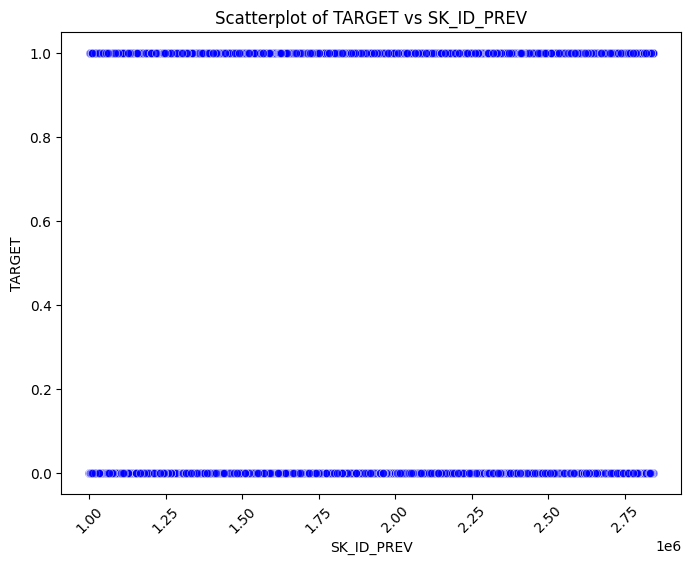

T-test Results for SK_ID_PREV vs TARGET: t-stat: 1.5663, p-value: 0.1173
No statistically significant relationship.



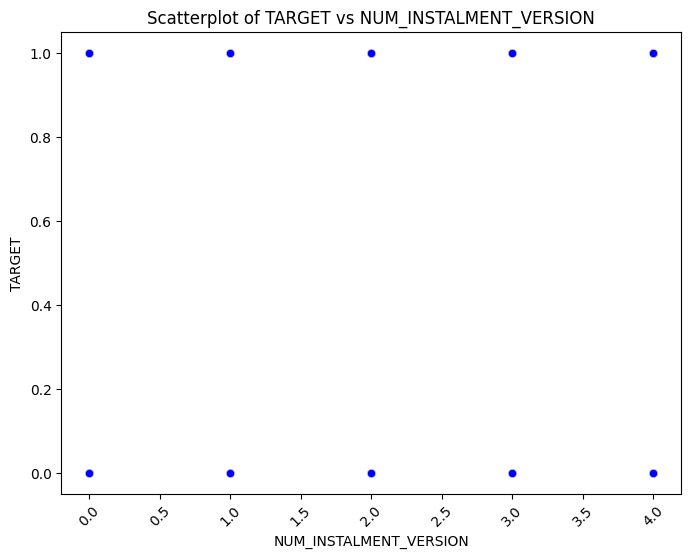

T-test Results for NUM_INSTALMENT_VERSION vs TARGET: t-stat: 6.8285, p-value: 0.0000
There is a statistically significant relationship.



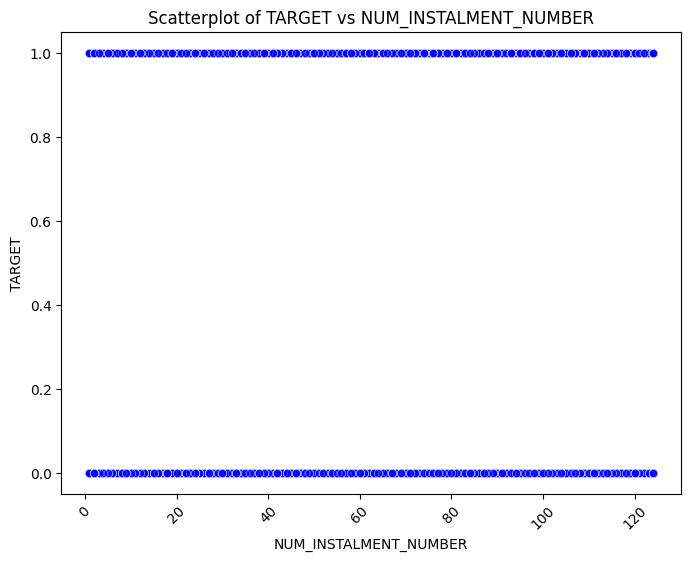

T-test Results for NUM_INSTALMENT_NUMBER vs TARGET: t-stat: 10.8761, p-value: 0.0000
There is a statistically significant relationship.



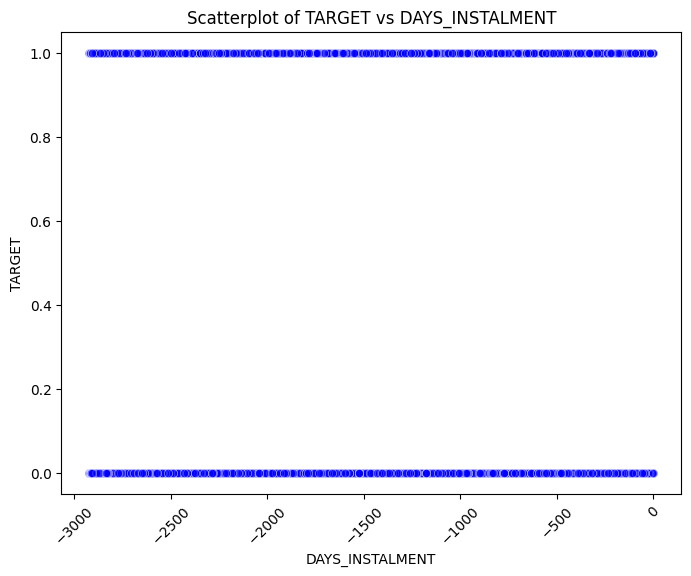

T-test Results for DAYS_INSTALMENT vs TARGET: t-stat: -25.6458, p-value: 0.0000
There is a statistically significant relationship.



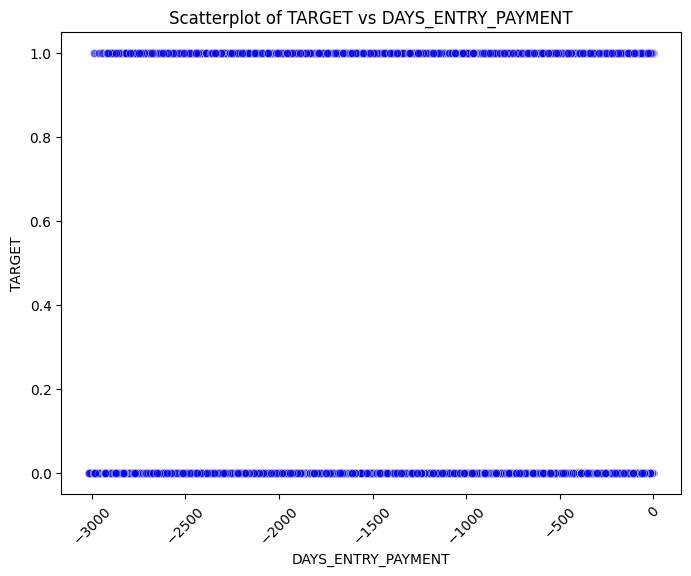

T-test Results for DAYS_ENTRY_PAYMENT vs TARGET: t-stat: -25.7449, p-value: 0.0000
There is a statistically significant relationship.



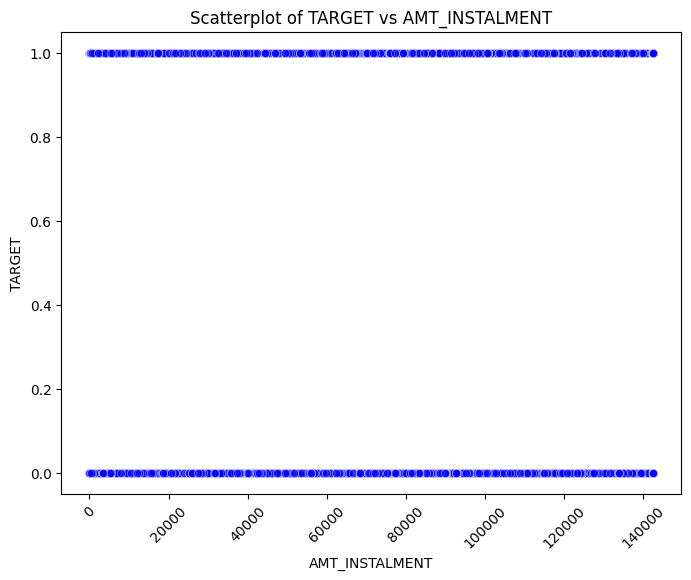

T-test Results for AMT_INSTALMENT vs TARGET: t-stat: 5.5091, p-value: 0.0000
There is a statistically significant relationship.



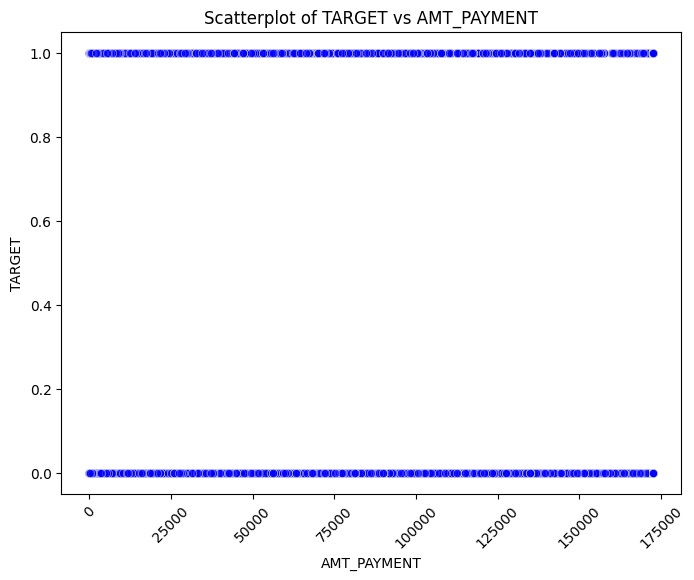

T-test Results for AMT_PAYMENT vs TARGET: t-stat: 7.2923, p-value: 0.0000
There is a statistically significant relationship.



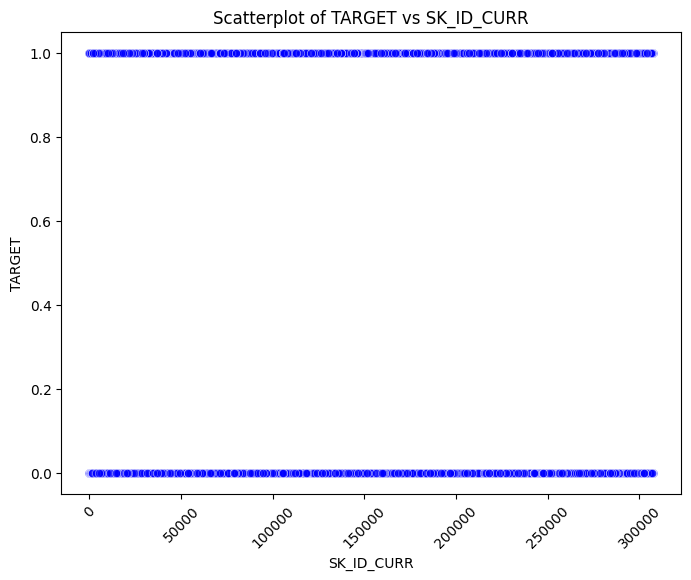

T-test Results for SK_ID_CURR vs TARGET: t-stat: 5.4708, p-value: 0.0000
There is a statistically significant relationship.



In [12]:
analyze_target_relationship(installment_update,"TARGET",installment.columns,0.1)

So the features : NUM_INSTALMENT_VERSION, NUM_INSTALMENT_NUMBER, DAYS_INSTALMENT, DAYS_ENTRY_PAYMENT, AMT_INSTALMENT,AMT_PAYMENT have relationship with TARGET.